## ProjF5 - Final Model

Use this document as a template to provide the evaluation of your final model. You are welcome to go in as much depth as needed.

Make sure you keep the sections specified in this template, but you are welcome to add more cells with your code or explanation as needed.

In [10]:
# Import necessary libraries
import os
from zipfile import ZipFile
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import layers, models
import tensorflow as tf
from keras.preprocessing import image
from keras.models import load_model
from tensorflow.keras.models import load_model

In [11]:
# Set seeds for reproducibility
import random
random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

### 1. Load and Prepare Data

This should illustrate your code for loading the dataset and the split into training, validation and testing. You can add steps like pre-processing if needed.

In [3]:
import zipfile
import os

zip_file_path = '/Users/merygaddam/Downloads/dataset.zip'
destination_directory = '/Users/merygaddam/Downloads'

In [4]:
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_directory)

print("Unzipped the dataset successfully!")

Unzipped the dataset successfully!


In [5]:
# Image Parameters
img_size = 128
batch_size = 32

# Directory containing the dataset
base_dir = "/Users/merygaddam/Downloads/dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"

# Image Data Generators with rescaling and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

# Test Data Generator with rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# Train Generator
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

# Validation Generator
validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

# Test Generator
test_generator = test_datagen.flow_from_directory(
    "/Users/merygaddam/Downloads/dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid",
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 56251 images belonging to 38 classes.
Found 14044 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


### 2. Prepare your Final Model

Here you can have your code to either train (e.g., if you are building it from scratch) your model. These steps may require you to use other packages or python files. You can just call them here. You don't have to include them in your submission. Remember that we will be looking at the saved outputs in the notebooked and we will not run the entire notebook.

In [6]:
# Model Definition
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

/Users/merygaddam/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


### 3. Model Performance

Make sure to include the following:
- Performance on the training set
- Performance on the test set
- Provide some screenshots of your output (e.g., pictures, text output, or a histogram of predicted values in the case of tabular data). Any visualization of the predictions are welcome.

In [73]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model checkpoints and early stopping
checkpoint = ModelCheckpoint(monitor='val_accuracy', save_best_only=True, mode='max', filepath = "/Users/merygaddam/Downloads/plant_disease_model.keras",verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True,verbose=1)

# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=5,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,  # Validation steps
    callbacks=[checkpoint, early_stop]
)

# Save the model
model.save("plant_disease_model.h5")

Epoch 1/5
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step - accuracy: 0.8741 - loss: 0.4199
Epoch 1: val_accuracy improved from -inf to 0.58469, saving model to /Users/merygaddam/Downloads/plant_disease_model.keras
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 779s 442ms/step - accuracy: 0.8741 - loss: 0.4199 - val_accuracy: 0.5847 - val_loss: 2.4186
Epoch 2/5
   1/1757 ━━━━━━━━━━━━━━━━━━━━ 12:25 425ms/step - accuracy: 0.9375 - loss: 0.2483
Epoch 2: val_accuracy did not improve from 0.58469
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 1s 89us/step - accuracy: 0.9375 - loss: 0.1242 - val_accuracy: 0.5357 - val_loss: 1.3034
Epoch 3/5


2024-04-26 21:12:17.403261: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-26 21:12:17.525464: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1757/1757 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step - accuracy: 0.8965 - loss: 0.3388
Epoch 3: val_accuracy improved from 0.58469 to 0.66981, saving model to /Users/merygaddam/Downloads/plant_disease_model.keras
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 789s 448ms/step - accuracy: 0.8965 - loss: 0.3388 - val_accuracy: 0.6698 - val_loss: 1.7180
Epoch 4/5
   1/1757 ━━━━━━━━━━━━━━━━━━━━ 13:15 453ms/step - accuracy: 0.9062 - loss: 0.2185
Epoch 4: val_accuracy did not improve from 0.66981
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 1s 107us/step - accuracy: 0.9062 - loss: 0.1093 - val_accuracy: 0.5714 - val_loss: 1.2733
Epoch 5/5


2024-04-26 21:25:26.562575: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-26 21:25:26.715220: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1757/1757 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step - accuracy: 0.9081 - loss: 0.2914
Epoch 5: val_accuracy improved from 0.66981 to 0.83319, saving model to /Users/merygaddam/Downloads/plant_disease_model.keras
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 775s 441ms/step - accuracy: 0.9081 - loss: 0.2913 - val_accuracy: 0.8332 - val_loss: 0.6114
Restoring model weights from the end of the best epoch: 5.


In [75]:
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)

549/549 ━━━━━━━━━━━━━━━━━━━━ 45s 82ms/step - accuracy: 0.7269 - loss: 1.4677


In [76]:
# Training Accuracy
training_accuracy = history.history['accuracy'][-1]

# Validation Accuracy
validation_accuracy = history.history['val_accuracy'][-1]

print(f'Training Accuracy: {training_accuracy * 100:.2f}%')
print(f'Validation Accuracy: {validation_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Training Accuracy: 91.12%
Validation Accuracy: 83.32%
Test Accuracy: 72.79%


In [12]:
model = load_model('plant_disease_model.h5')

In [13]:
# Print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     4,719,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        19,494 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,128,936 (19.57 MB)

 Trainable params: 5,127,974 (19.56 MB)

 Non-trainable params: 960 (3.75 KB)

 Optimizer params: 2 (12.00 B)

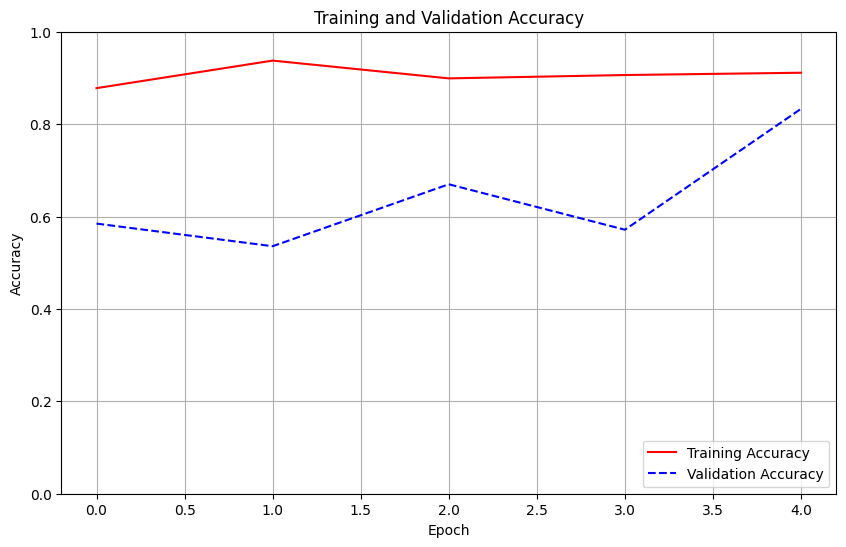

In [79]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 6))  
plt.plot(history.history['accuracy'], 'r-', label='Training Accuracy') 
plt.plot(history.history['val_accuracy'], 'b--', label='Validation Accuracy')  
plt.title('Training and Validation Accuracy') 
plt.ylabel('Accuracy') 
plt.xlabel('Epoch') 
plt.legend(loc='lower right') 
plt.grid(True) 
plt.ylim([0, 1]) 
plt.show()

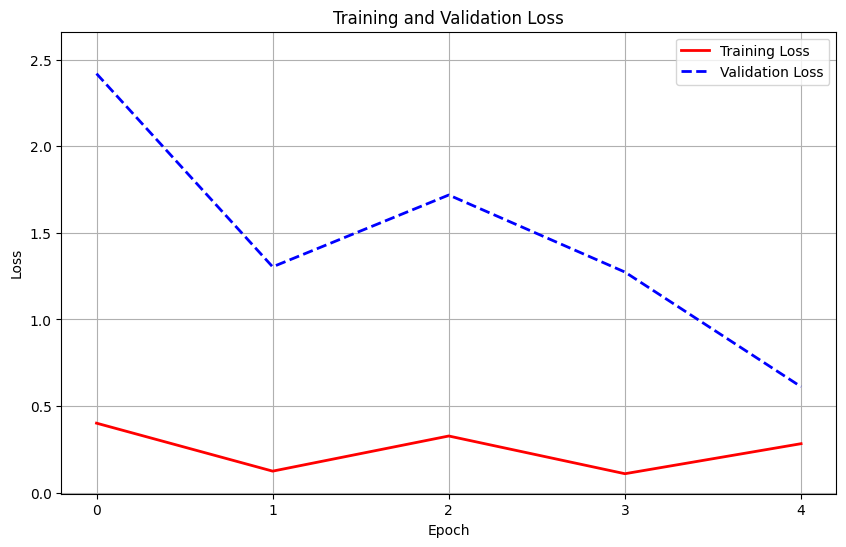

In [80]:
# Plot training & validation loss values
plt.figure(figsize=(10, 6)) 
plt.plot(history.history['loss'], 'r-', label='Training Loss', linewidth=2)  
plt.plot(history.history['val_loss'], 'b--', label='Validation Loss', linewidth=2) 
plt.title('Training and Validation Loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(loc='upper right')  
plt.grid(True) 
plt.ylim(top=max(max(history.history['loss']), max(history.history['val_loss'])) * 1.1)  
plt.xticks(range(0, len(history.history['loss'])))
plt.show()

Prediction

In [81]:
# ImageDataGenerator for preprocessing images
data_generator = ImageDataGenerator(
    rescale=1./255,  
)

# Creating a data loader for the dataset
train_data_loader = data_generator.flow_from_directory(
    base_dir,
    target_size=(128, 128),  
    batch_size=32,
    class_mode='categorical',  
    shuffle=True  
)

class_labels = train_data_loader.class_indices
class_labels = {v: k for k, v in class_labels.items()}  

print("Class labels based on training data:", class_labels)

Found 70295 images belonging to 38 classes.
Class labels based on training data: {0: 'Apple___Apple_scab', 1: 'Apple___Black_rot', 2: 'Apple___Cedar_apple_rust', 3: 'Apple___healthy', 4: 'Blueberry___healthy', 5: 'Cherry_(including_sour)___Powdery_mildew', 6: 'Cherry_(including_sour)___healthy', 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 8: 'Corn_(maize)___Common_rust_', 9: 'Corn_(maize)___Northern_Leaf_Blight', 10: 'Corn_(maize)___healthy', 11: 'Grape___Black_rot', 12: 'Grape___Esca_(Black_Measles)', 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 14: 'Grape___healthy', 15: 'Orange___Haunglongbing_(Citrus_greening)', 16: 'Peach___Bacterial_spot', 17: 'Peach___healthy', 18: 'Pepper,_bell___Bacterial_spot', 19: 'Pepper,_bell___healthy', 20: 'Potato___Early_blight', 21: 'Potato___Late_blight', 22: 'Potato___healthy', 23: 'Raspberry___healthy', 24: 'Soybean___healthy', 25: 'Squash___Powdery_mildew', 26: 'Strawberry___Leaf_scorch', 27: 'Strawberry___healthy', 28: 'Tomato___

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


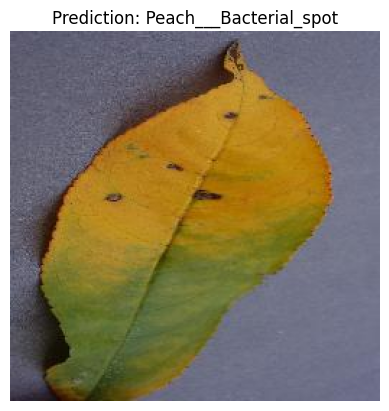

In [87]:
# Load and preprocess an image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128)) 
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  
    return img, img_array 

# Load the original image for display
def load_image_for_display(img_path):
    img = image.load_img(img_path)
    return img

img_path = '/Users/merygaddam/Downloads/dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Peach___Bacterial_spot/0eb8a77a-fe2b-43f8-804c-d958c01ba0c0___Rutg._Bact.S 1188.JPG'

# Process the image and predict
display_img = load_image_for_display(img_path)
img, img_preprocessed = load_and_preprocess_image(img_path)
prediction = model.predict(img_preprocessed)
predicted_class_index = np.argmax(prediction[0])
predicted_class_name = class_labels[predicted_class_index]

# Display the image and prediction
plt.imshow(display_img)
plt.title(f'Prediction: {predicted_class_name}')
plt.axis('off') 
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


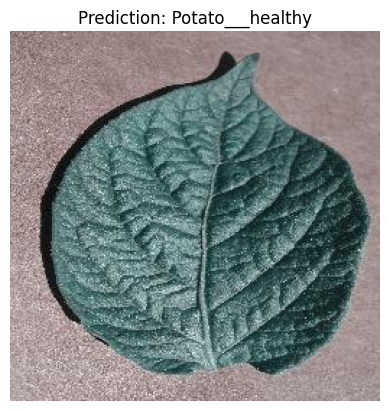

In [88]:
# Load and preprocess an image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))  
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) 
    return img, img_array  

# Load the original image for display
def load_image_for_display(img_path):
    img = image.load_img(img_path)
    return img

img_path = '/Users/merygaddam/Downloads/dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Potato___healthy/00fc2ee5-729f-4757-8aeb-65c3355874f2___RS_HL 1864_newGGR.JPG'

# Process the image and predict
display_img = load_image_for_display(img_path)
img, img_preprocessed = load_and_preprocess_image(img_path)
prediction = model.predict(img_preprocessed)
predicted_class_index = np.argmax(prediction[0])
predicted_class_name = class_labels[predicted_class_index]

# Display the image and prediction
plt.imshow(display_img)
plt.title(f'Prediction: {predicted_class_name}')
plt.axis('off') 
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


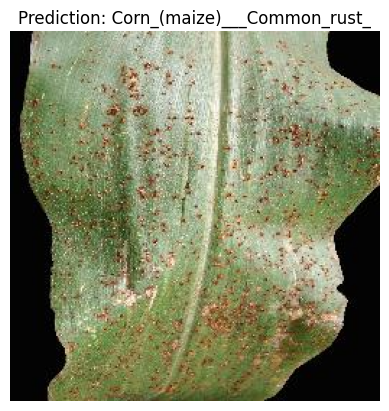

In [89]:
# Load and preprocess an image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))  
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) 
    return img, img_array  

# Load the original image for display
def load_image_for_display(img_path):
    img = image.load_img(img_path)
    return img

img_path = '/Users/merygaddam/Downloads/dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Corn_(maize)___Common_rust_/RS_Rust 1588.JPG'

# Process the image and predict
display_img = load_image_for_display(img_path)
img, img_preprocessed = load_and_preprocess_image(img_path)
prediction = model.predict(img_preprocessed)
predicted_class_index = np.argmax(prediction[0])
predicted_class_name = class_labels[predicted_class_index]

# Display the image and prediction
plt.imshow(display_img)
plt.title(f'Prediction: {predicted_class_name}')
plt.axis('off')
plt.show()